# Introduction to Two-Sample Hypothesis Testing

### Data Science 410


## Introduction

This note book introduces you to the concepts of classical hypothesis testing. Specifically, this notebook covers **two sample tests for continuous variables**. You may know the two-sample hypothesis tests by the term **A/B tests**.     

But what do we mean by a statistical **hypothesis test**? A statistical hypothesis test determines if the distributions of observations resulting from **different treatments** are **significantly different**. This definition may seem simple, but in fact, encapsulates a lot of complexity. We will focus on some of the most important details in this lesson.     

At the conclusion of this lesson you should be able apply basic classical two-sample hypothesis tests to some common situations.  

![](img/HypothesisCartoon.png)
<center>**Testing a hypothesis**</center>



### Examples of hypothesis tests

Let's consider practical scenario of using hypothesis tests methods. This scenario includes the following steps:

- **Identify a hypothesis that can be tested:** In this example,we want to know if using a larger logo on our web site will drive significantly more traffic. In this case, the **null hypothesis** is that the size of the logo does not matter. 
- **Select a criteria to evaluate the hypothesis:** If our sample has a probability of $<= 10\%$ that chance or randomness alone caused the observed difference we will **reject the null hypothesis** that the logo does not mater. This criteria is known as the **cutoff**. 
- **Select a random sample from the population:** Randomly assign a cookie to new site users that tells the server to show A or B website. One of these web sites is the original, and the other has the larger logo. In statistical terminology we call these two cases **treatments**.  
- **Calculate the test statistic** to compare observations to what we expect to observe. If the test statistic is beyond the cutoff value we say the differences are **significant** and reject the null hypothesis. 

The foregoing seems like a simple recipe, but there are many pitfalls.   
- **Rejecting the null hypothesis does not mean we should accept our proposed alternative**. 
- **Significance simply means the cutoff value has been exceeded, but does not mean the inference is actually important in human terms**. 

We will have more to say about these and other complications latter. 

### Hypothesis testing steps

Let's outline the steps required to perform a formal two-sample hypothesis test. These steps include: 

- We first state our population assumptions in the null hypothesis: $H_0$.
- We state our new alternative hypothesis as an alternative to the null: $H_a$. This is typically stated in terms of a **treatment**. The treatment is the factor that differentiates the population.     
- Decide on a significance level (probability cutoff): 0.1, 0.05, and 0.01 are commonly used. The correct cutoff is problem specific.
- Data is collected for the different treatments. In this case, the treatments are the old web site and the new web site. 
- Compute the statistic and evaluate it based on the cutoff value. 
- Based on our findings we can only do two things:
  - **Reject the null-hypothesis:** This is not the same as accepting the alternative hypothesis.
  - **Fail to reject the null hypothesis:** This is not the same as accepting the null hypothesis. 
- Rejecting the null hypothesis can occur for several reasons, including:   
  - The alternative hypothesis was false to begin with.
  - We did not collect enough evidence for the **size of the effect**. Roughly speaking, the effect size is difference in populations under the different treatments. We will explore this aspect of the problem in the **power** discussion. 

## A Simple Cutoff Example

Let's try a simple example of computing a cutoff. We will start by computing the one-sided tail probability of a Normal distribution. In this case we will look at the probability of a the interval from $1.28155$ to infinity of the standard Normal distribution. Execute the code in the cell below and examine the result. 

In [9]:
from scipy.stats import norm
import numpy as np
import numpy.random as nr
import pandas as pd
from statistics import mean
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
import statsmodels.stats.power as smsp
import matplotlib.pyplot as plt
%matplotlib inline

# One tailed probability
def prob_normal(a, b, mean=0, sd=1):
    return(ss.norm.cdf(b, mean, sd) - ss.norm.cdf(a, mean, sd))
#prob_normal(20.1262055, float('inf'), 15, 4)
prob_normal(1.28155, float('inf'), 0, 1)

0.10000027475074158

The probability of the Normal distribution having a value greater than $1.28155$ is 0.10. This value is then the 0.10 cutoff. **The probability of a value of $1.281$ or greater is 0.10**. 

You can verify that the probability of the entire distribution is 1.0 by executing the code in the cell below.

In [10]:
prob_normal(-float('inf'), float('inf'), 15, 4)

1.0

More typically in hypothesis testing, we set the cutoff and then must determine the value of the statistic. For example, what is the value for a standard Normal at the cutoff probability of 0.10. Execute the code in the cell below to find out. 

In [11]:
def cutoff_stat(alpha, mean=0, sd=1, one_tailed=True):
    if((alpha > 0.0) & (alpha < 1.0)):
        if(one_tailed):
            return(norm.ppf(1.0 - alpha, loc=mean, scale=sd))
        else:
            return(norm.ppf(1.0 - alpha/2.0, loc=mean, scale=sd))
    else:   
        print('alpha must be btween 0 and 1')
cutoff_stat(0.1, mean = 0.0, sd = 1.0)

1.2815515655446004

Not surprisingly the result is $1.28155$. As before, the probability of events of 1.28155 of greater is 0.10. Thus we call the value, $1.28155$, the **critical value**. 

**Your Turn:** find the probability of a standard Normal in the following intervals:
- -1 to 1
- -2 to 2
- -3 to 3

What are the approximate probabilities? What does this result tell you about the probabilities values this extreme or greater. 

## Cutoff for hypothesis tests

Let's consider the cutoff further, in terms of hypothesis tests. In this case we will use the **difference of means** between two distributions as an example. The null hypothesis is that the difference in means is not significantly different. 

As already stated, the cutoff, which we denote $\alpha$, is a **threshold for determining significance of the test**. If the probability of observing a **difference of means at least as larger as the critical value** is computed, the test is considered significant.   

Graphically we can illustrate the concept of the cutoff for $\alpha = 0.10$ as shown below.

<img src="img/cutoff.jpg" alt="Drawing" style="width:600px; height:200px"/>

If the observed difference of means is greater than the critical value we will **Reject the Null Hypothesis with $90\%$ confidence:**. On the other hand, if the difference is less than the critical value we cannot reject the null hypothesis. 

if the mean of the time spent on the new web page is in the blue region, we can reject the null hypothesis. The difference in means is considered **significant**. 


### How many tails do you have?

The example above is a one-sided hypothesis test. But, there are other alternatives! Could the new web site be worse? Quite possibly! 

In fact, there are **three possibilities** for the tail(s) of the distribution used to evaluate tests. These three cases are shown in the figure.

<img src="img/tails2.jpg" alt="Drawing" style="width:600px; height:400px"/>

The accept-rejection criteria for the null hypothesis for each of these three cases can be characterized:

- **One-tail test with value $\gt$ the cutoff**. The alternative hypothesis is that the mean is **significantly less** than the null hypothesis.
- **One-tail test with value $\lt$ the cutoff**. The alternative hypothesis is that the mean is **significantly greater** than the null hypothesis.  
- **Two-tail test with value $\lt\ -cutoff/2$ or $\gt\ cutoff/2$**. The alternative hypothesis is that the mean is **significantly different** from the null hypothesis. This could mean larger or smaller. Notice that the **cutoff value is divided by two to determine the value for each tail**. 


## What is  the p-value?

Results of hypothesis tests are often reported as a p-value. You must be careful to correctly interpret the p-value. In summary, we can characterize the p-value as follows:    

- **Significance** of the test is determined by the p-value. If the p-values is less than the cutoff, the effect is considered significant. 
  * **Beware!:** statistical significance is not a measure of actual importance. 
  * Significance only means that there is a reasonable probability the null hypothesis should be rejected. Further investigation, including applying **domain knowledge**, is required to determine if difference is actually important.  
- In technical terms, a p-value is the probability of obtaining an effect **at least as extreme** as the one in your sample data, assuming the null hypothesis is true.
For example, for a vaccine study with a p-value of 0.04, you’d obtain the observed difference or more in 4% of studies due to random sampling error.
**P values address only one question: how likely are your data, assuming a true null hypothesis?** 
- **P value does not measure support for the alternative hypothesis!**
   * For example, the p-value of 0.04 does not mean there is a 0.96 probability that the effect of the new vaccine is significantly different. 
   * A smaller p-value does not mean a result is more significant.


### How to Use P-Value

The proper application of p-values is both difficult and confussing. Even professional scientists with with considerable experince routinely misuse p-values. This misuse often leads to incorrect inferences and **non-repeatability** of scientific results. 

In 2019 the American Staatistical Association organized a committee to outline the [proper use of p-values](https://www.amstat.org/asa/files/pdfs/P-ValueStatement.pdf). The resulting report by [Wasserstine and Lazar was published in the Ammerican Statistician](https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108#.XiuCXWhKhEY). The key points of this report can be summarized:

1. A p-value is a measure of the incompatibility between the data and a specific model. 
  - Typically the model is a **null hypothesis**, $H_a$.  
  - Null is hypothesis is that there is **no effect**.
  - Smaller p-value indicates **greater incompatibility**.  
2. p-value or statistical significance **does not measure the probability that a hypothesis is true** or the probability that data resulted from chance alone.   
  - P-value does measure the truth of the null hypothesis.
  - p-value is not a statement about an explanation of the data. That is, a p-value does not support any particular theory. 
3. Important conclusions **cannot be based on a p-value passing a threshold alone**.   
  - Scientific inference is **not a mechanical process**.    
  - Context matters of the investigation matters. Any hypothesis must make sense in terms of the problem at hand. 
  - Alternatives must be considered for the problem at hand. 
  - A true-false outcome is often too simplistic. There may be a range of possible viable hypotheses. 
4. Proper inference requires full reporting and transparency. 
  - All p-values must be considered and reported
  - Avoid p-hacking: selecting just the ‘significant’ results
  - All hypotheses tested must be reported
5. A p-value or statistical significance does not measure effect size or importance
  - Statistical significance, may not correspond to human significance
  - Smaller p-value does not imply larger effect or greater significance
  - Significance is affected by sample size, measurement error, effect size, etc.
6. In isolation, a p-value does not provide a measure of evidence regarding a model or hypothesis
  - All p-values must be considered and reported
  - Avoid p-hacking: selecting just the ‘significant’ results
  - All hypotheses tested must be reported

### Mistakes with P-Values

There are many ways to mis-interpret or misuse p-values. Perhaps, the most common errors are these:

1. Interpreting a P value as the probability of mistakenly rejecting a true null hypothesis (a **type I error**).
  - P values calculations assume the null hypothesis is true for the population and the difference means is due to sampling. **P values can not tell you the probability that the null is true or false!** 
  - For the vaccine study, correct and incorrect way to interpret a P value of 0.04:
    * Correct: If vaccine has no effect,  **the observed difference or more arises solely from random sampling in 4% of studies.**
    * Incorrect: By rejecting the null hypothesis, there is a 4% chance of Type 1 error.
2. The second common mistake: you can deduce the probability that the alternative hypothesis is correct (e.g. $1.0 - p$, or a **type II error**).  

## The t-test

The Student t-test is one of the oldest and most widely used classical hypothesis tests. Student’s T-test, tests a hypothesis about the means of data samples:
- Does a population mean has a specified value?
- Test the difference between two means (equal, unknown variances).
- Test a paired-response difference from zero. E.g. a before/after drug treatment on patients.
- Test the importance of variables (later in class). For example, is the slope of a line zero or not?
- Welch’s T-test for the difference between two means (unknown, potentially different, variances).

Went considering the choice of test, keep in mind that **picking  different tests changes the test results.** When the more assumptions we make, the easier it is to tell the difference between populations. Conversely, the more assumptions we make, the more restrictive the conditions under which the test can be applied. For example:   
- If we pick a test that assumes that the populations have equal variance, the test will be more likely to detect a difference in means.  
- However, the assumption of equal variances is quite restrictive. 

Fortunately, the above differences only matter for **small samples**. While small samples were the norm in the early 20th Century, most of the time in the 21st Century we work with **large samples**. With large samples, giving up a few degrees of freedom to relax the assumptions of a test is unlikely to be consequential.     

### Who was Student?

Student was a pseudonym for William Sealy Gosset. Gosset worked for Guinness Company and perform experiment to improve brewing. 

Gosset published the theory of the t-test in 1908 under his pseudonym, 'Student'. There is an apocryphal story that Gosset used a pseudonym since the Guinness company forbit employees from publshing research. However, recently this story has been disproven, as the Guinness company never had such a rule.    

<img src="img/Gosset_1908.jpg" alt="Drawing" style="width:300px; height:400px"/>
<center>William Sealy Gosset in 1908</center>

<img src="img/gossett.jpg" alt="Drawing" style="width:500px; height:250px"/>
<center>Plaque at site of Gosset's home</center>


### Why the t-distribution

As you might expect from the name, the t-test is based on tests on a t-distribution. It turns out that the difference in means between two Normal distributions follows a t-distribution. The t-distribution has many nice properties including:

- The t-distribution is the natural distribution for tests on differences of means. 
- The t-distribution has heavier tails than the Normal and relaxes assumptions on the differences.
- For high degrees of freedom, the t-distribution converges to a Normal distribution, by the Central Limit Theorem. 

##  A first t-test example

As a first example, compare the means of two Normal distributions. Execute the code in the cell below to compute samples from two Normal distributions with slightly different means.

In [12]:
nr.seed(seed=233423)
pop_A = norm.rvs(loc=150, scale=7, size=25)
pop_B = norm.rvs(loc=153, scale=4, size=35)

The code in the cell below creates histograms of the two populations along with a line for the mean of each population. Execute this code and examine the results.  

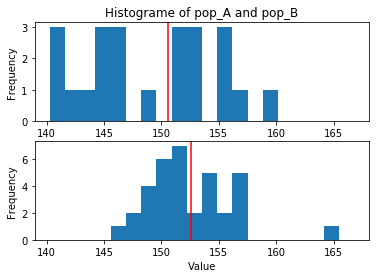

In [13]:

def hist_plot(vec, bins):
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(pop_A, pop_B)    

Notice that the values of the distributions of these populations overlap quite a bit and the means are close. The question is, are these differences significant?  

You can now compute the two-sided t-test to determine if the difference of means is significant. A number of summary statistics are computed and printed for the test. The two-sided t-test is used to determine we can reject the null hypothesis that the difference of means is not significant. 

In this case, we know we cannot assume equal variance of the two populations. Therefore, we use Welch's t-test. 

Computing a t-test including the usual summary statistics with [statsmodels.stats](https://www.statsmodels.org/stable/stats.html), requires several steps. You can the t-statistic and see the results by executing the code in the cell below.

In [14]:
def t_test(a, b, alpha, alternative='two-sided', usevar = 'unequal'):
    '''Function to compute a two sample t-test on means'''
    
    ## Compute the difference in means for reporting.
    diff = a.mean() - b.mean()

    ## Compute the t-test
    t, p, df = ws.ttest_ind(a, b, usevar=usevar)
    
    ## Find the confidence interval
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar=usevar) 

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([df, diff, t, p, confint[0], confint[1]], index = index)  
   

test = t_test(pop_A, pop_B, 0.05)
test

DegFreedom    32.527186
Difference    -1.975956
Statistic     -1.226974
PValue         0.228639
Low95CI       -5.254211
High95CI       1.302298
dtype: float64

Examine these statistics noticing the following:
1. The **degrees of freedom** determine the shape of the t-distribution used for the test.
2. **Difference in means** is small.
3. **t-statistic is small and the p-value is large**. There is a high chance that the difference in means is **not significant**. 
4. The **95% confidence interval straddles 0**, indicating that a 0 difference in means is within the CI.  

Based at the above statistics we **cannot reject the null hypothesis**. As we have already said, this does not mean we accept the null hypothesis. 

The code in the cell below makes a similar plot to the ones you have already created, but with the the upper and lower confidence bounds shown as dashed lines. Execute this code and examine the results. 

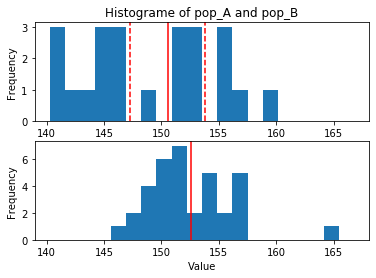

In [15]:
def hist_mean_ci(vec, t_test, bins):
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(pop_A, pop_B, test)    

Notice that the mean of the population in the lower plot are within the confidence interval of the difference of means of the population. This confirms that we cannot reject the null hypothesis that there is no significant difference in these means. 

**Your Turn:** In the previous example the difference of means was not significant. Now, you will repeat this analysis but with a slightly greater difference in means. Create two populations with means (`loc`) of `150` and `155`, using the same scale and a random seed of 357. Determine if this difference in means is significant using the `t_test` and `plot_t` functions.  

In [20]:
nr.seed(357)

Examine these results and answer the following questions:
1. Based on the t-statistic, p-value, and confidence interval can you reject the null hypothesis? 
2. Does the mean of the second population fall within the confidence interval of the difference of means? 

### Power of Tests

The **power of a test** is formally defined as:

$$power = P(reject\ H_0| when\ H_a\ is\ true)$$

In pain language, the **power is the probability of getting a positive result when the null hypothesis is not true**. Conversely, a test with **insufficient power will not detect a real effect**. Clearly, we want the most powerful test we can find for the situation. A powerful test gives a better chance of detecting an effect. 

Computing test power can be a bit complex, and analytical solutions can be difficult or impossible. Often, a simulation is used to compute power. 

Let's look at the example of computing power for the two sample t-test for the difference of means. The power of this test depends on the several parameters:   

- The type of test.  
- The number of samples.   
- The anticipated difference in the population means, which we call the **effect size**.   
- The significance level of  the test.   

When running a power test, you can ask several questions, which will assist you in designing an experiment:   
- Most typically, you will determine how big a sample is required to have good chance of rejecting the null hypothesis given the expected effect size. 
  * Traditionally, a power level of 0.8 is considered adequate. However, at this power level there is a 1 in 5 chance of not detecting the desired effect.  
  * One should carefully consider the power level required for the situation at hand.
- Or, you can also determine how big an effect needs to be given a fixed sample size (all the samples you have or can afford) to have a good chance of rejecting the null hypothesis.  
- Finally, you can determine the how different cutoff values change the likelihood of finding an effect.   

The Python statsmodels package provides power calculations for a limited set of hypothesis tests. We can use these capabilities to examine the power of t-tests under various assumptions. 

The code in the cell below does the following:

- Create a sequence of effect sizes.
- Compute a vector of power values for the effect size using [statsmodels.stats.power.tt_ind_solve_power](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html).
- Plot the effect size vs. power. 

Execute this code and examine the result. 

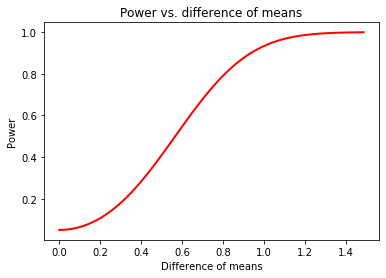

In [16]:
nr.seed(seed=23344)
diffs = np.arange(start = 0.0, stop = 1.5, step = .015)
x = 25
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 25, 
           alpha = 0.05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in diffs]

def plot_power(x, y, xlabel, title):
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')    

Examine these results and notice how the power of the t-test rapidly increases as the difference in means increases. At a relatively small difference in means the power of the test is approaching 1.0, the maximum possible. 

**Your turn:** In the code cell below, compute and plot 100 values of test power for significance levels in the range $\{0.001, 0.25\}$. Set `n = 25`, `d = 1.0`, for the number of samples and the difference in means.
***

Exmine the plot you have created. At a significance level of 0.20 is the power of the t-test approaching 1.0. 

***
**Your turn:** In the code cell below, compute and plot 100 values of test power for sample size in the range $\{1, 100\}$. Set `d = 1.0`, and `sig.level = 0.05`, for the difference in means and the significance level.
***

Examine the plot you have created. The power of the t-test at 20 samples is approximately what value?

## Example: Tests on Gaulton's height data (1886)

Francis Gaulton published his seminal paper on the theory of regression in 1886. This paper has been enormously influential in statistics, as the linear regression model is still used today; in a different form from Gaulton's approach. 

Gaulton showed that the heights of members of a family 'regress to the mean', and that the height of the parents does not determine the heights of their adult children. In this exercise, we will take a different approach to analyzing these data. We will use the t-test to compare the difference in means of the heights of parents and their adult children. 

As a first step, load the data from the .csv file provided and have a look at the first few rows of the data frame by executing the code in the cell bellow. 

In [17]:
GaltonFamilies = pd.read_csv('GaltonFamilies.csv')
GaltonFamilies.head(10)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
6,002,75.5,66.5,73.66,4,3,female,65.5
7,002,75.5,66.5,73.66,4,4,female,65.5
8,003,75.0,64.0,72.06,2,1,male,71.0
9,003,75.0,64.0,72.06,2,2,female,68.0


This data set has 9 columns:
 1. A case or row number.
 2. A unique code for each family in the sample.
 3. The height of the father in inches.
 4. The height of the mother in inches.
 5. The average height of the parents.
 6. The number of childern in the family.
 7. A code for the each unique child in the family.
 8. The gender of the child.
 9. The height of the adult child in inches. 
 
 To analyze these data we divide them into two groups based on the gender of the adult childern. The code in the cell below divides the data set, plots two histograms to compare the hights of the two samples and performs two-sided the t-test on difference of the means of these samples. 

DegFreedom     9.298860e+02
Difference     5.130122e+00
Statistic      3.147649e+01
PValue        1.243518e-148
Low95CI        4.810266e+00
High95CI       5.449979e+00
dtype: float64


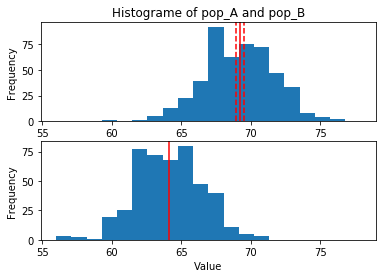

In [18]:
male = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'childHeight']
female = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'female', 'childHeight']

test_Galton = t_test(male, female, alpha = 0.05)
print(test_Galton)
plot_t(male, female, test_Galton)   

Examine these results noticing the following:
1. The t-statistic is large, the p-value is small and the confidence interval of the difference of the means does not overlap zero. We can **reject the null hypothesis** that the means are the same. There is a low chance that the difference in means arises from the same distribution.
2. The mean of the second sample falls outside the confidence interval, confirming that there is a low chance that the difference in means is from random variation alone.

**Your Turn:** Compute the t-statistics and plot the histograms for the difference in means of the fathers and their adult sons. It could be the case that children are taller than their parents. To test this idea, use the `alternative = 'larger'` argument of the `t_test` function. Using this argument defines a **one-sided t-test**.

Examine your results and anwer the following questions. 
1. For the one-sided test, the what is the upper bound on the confidence interval? 
2. Given the value of the t-statistic, the p-value and the confidence interval can you reject the null hypthesis? 

## Paired t-tests

There is also a version of the t-test for paired data. Classically, paired tests are used to compare data from before and after a medical treatment. The same patient is measured before and after treatment, creating a pair of measurements on the same subject. The effect can then be measured in terms of each pair.  

The heights of mothers and their adult sons is an example of paired data. Each son has a specific mother, not a random mother. The effect can be measured between each son and his mother. 

Sometimes the paired t-test is referred to as the dependent t-test. The null hypothesis is that there is no change between after the treatment. 

There is no paired t-test in statsmodels, so we use scipy.stats. The code in the cell below uses the [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html) to compute the paired t-test. Execute the code in the cell below and  examine the results.

DegFreedom     9.459687e+02
Difference     5.200832e+00
Statistic      3.949802e+01
PValue        6.323181e-153
Low95CI        4.887331e+00
High95CI       5.514333e+00
dtype: float64


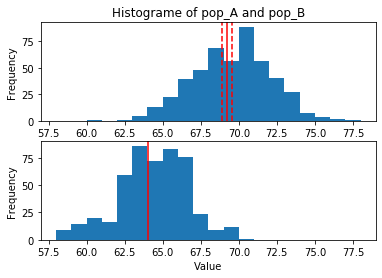

In [19]:
## Welche's test for paired data
def t_test_paired(a, b, alpha, alternative='two-sided'):
    
    diff = np.mean([x - y for x,y in zip(a,b)])
    res = ss.ttest_rel(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   
mother = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'mother']
Galton_paired = t_test_paired(male, mother, alpha = 0.05)
print(Galton_paired)
plot_t(male, mother, Galton_paired) 

***
**Your turn:** You have seen that we cannot reject the null hypothesis for a difference in means of the fathers and their sons, which was only about `0.1`. It could be that this is an issue with test power. 

In the code cell below use the `pwr.t2n.test` function to plot 100 values of the difference in means in the range $\{0.0, 1.0 \}$. The sample size arguments to this function are `n1 and n2`, and the `sig.level - 0.05`. 

Execute your code and examine the results. How big should the difference be to have a power or 0.9? 
***

In [25]:
2**7 - 7

121

Examine your plot. With a difference in means of 0.3 approximately what is the power of the test? 

## Classical Tests and Big Data

With the increasing scale of data sets in the 21st Century, problems with the correct application of classical tests have been amplified. The primary issue is with false positives, or **Type I errors**. This problem is known as the problem of **multiple comparisons** or **base rate fallacy**. 

To understand this problem lets look at a simple example. If we have 7 groups, there are $2^7 - 7 = 121$ possible interactions between the groups. If we use a t-test with a significance level of 0.05, we expect to see approximately 6 **false positives**, even if the null hypothesis is true in all cases. This is a manifestation of the **base rate fallacy**.   

These problems grow as the number of groups grow. As another example, consider classifying several millions objects from images. 



### Bonfirroni correction  

Several adjustments to the multiple comparisons problem have been proposed. In 1979 Holm published a method know as the **Bonferroni correction**. The adjustment is simple:

$$\alpha_b = \frac{\alpha}{m}\\
with\\ 
m =\ number\ of\ groups$$

The problem with the Bonferroni correction is the reduction in power as the  grows smaller. For big data problems with large numbers of groups, this issue can be especially serious. 

### Confidence and credible intervals

Another approach to the base rate fallacy problem is to use **confidence intervals**. For example, one can compute the confidence intervals of the distributions of differences of means between groups. We have just seen an example with Tukeys HSD method. 

Interpretation of confidence intervals is quite straight forward, especially when compared to p-values. If the confidence intervals for the difference in means do not overlap 0 the difference in means is significant. The confidence intervals can be adjusted analogously to the Bonfirroni correction. 

Yet another approach is to use the Bayesian **credible interval**. While the computation is different, the interpretation is intuitive, and analogous to interpretation of confidence intervals. 

Still, none of these methods is perfect. There are still risks of a significant numbers of false positives. 

## Hypothesis Testing Summary

The forgoing discussion covers many types of tests. The following summary will help you select tests when comparing means:   
  - If you know population mean and variance, use standard normal ‘z-test’.
  - If you just know population mean, use t-test.
  - If you don't know the mean and variance, use Welch’s t-test.
  - Tests for paired and unpaired data.

## Summary

We have covered lot of ground in this lesson. Specifically we have discussed:

- Mean comparison tests in the form of the t-test. In this case, the null hypothesis is that there is no significant difference in means and the samples are from the same population.   
- The meaning of the p-value or significance level. A p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the null hypothesis is true.
- Power of tests. The power of a test is the probability of getting a positive result when the null hypothesis is not true. 
- Multiple comparison issues with applying tests to big data problems. 

#### Copyright 2019, 2020, Stephen F Elston. All rights reserved. 